## Read .ghg metadata

In [21]:
import preProcessing
import importlib
import time
importlib.reload(preProcessing)
T1 = time.time()

# pr = preProcessing.read_ALL('BB',2022,6,processes=1,Test=2)

# for m in range(1,12):
#     pr = preProcessing.read_ALL('BB',2023,m,processes=8,file_type='ghg')#,copy_From="X:\\BBS\\EC_Station\\",copy_tag='FLUX')

# pr = preProcessing.read_ALL('BB',2023,6,reset=1,processes=8,file_type='ghg')

y = 2023
m = 6
pr = preProcessing.read_ALL('BB',y,m,processes=8,file_type='ghg',copy_From=f"Y:\\BB\\raw\\{y}\\{str(m).zfill(2)}\\")
T2 = time.time()

print('\n')
print('Runtime: ',(T2-T1)/60,' minutes')


Y:\BB\raw\2023\06\
Copying Files[████████████████████████████████████████████████████████████] 1421/1421

Preprocessing 2023 06[████████████████████████████████████████████████████████████] 1408/1408



Runtime:  6.295287589232127  minutes


In [22]:
import setupEP as eP
import importlib
import time
importlib.reload(eP)

########## Note - incomplete ghg or biomet files can crash program (preprocessing procedures should help prevent that by re-naming incomplete files)

T1 = time.time()
mR = eP.makeRun('ep_Templates/DefaultSettings.eddypro','BB',Processes=6,priority = 'high priority')

mR.runDates(['2023-06-01 00:00','2023-06-30 23:59'])
# mR.runDates(['2023-01-01 00:00','2023-12-31 23:59'])
T2 = time.time()
print('\n')
print('Runtime: ',(T2-T1)/60)


Splitting into 3 batches due to update metadata
Running EddyPro[████████████████████████████████████████████████████████████] 13/13

Runtime:  54.331730512777966


## Full Runtime

### Reading & Preprocessing on Y: drive then writing EddyPro results locally:

1 Month of BB data (20 hz)

**Preprocessing**: 3.91 minutes (8 cores)
**Processing**: 55.74 minutes (6 cores)

Total: **59.65** minutes

### Copying data to C then writing EddyPro results locally:

1 Month of BB data (20 hz)

**Preprocessing**: 6.30 minutes (1 core copy > 8 core preprocessing)

**Processing**: 54.33 minutes (6 cores)

Total: **60.3** minutes

* Paralellizing data copy could shave enought time to get marginal benfit, but doesn't look to matter much

count    521.000000
mean      -2.281643
std        2.056307
min       -6.401300
25%       -3.689640
50%       -2.706570
75%       -1.413590
max        3.191630
Name: co2_flux, dtype: float64

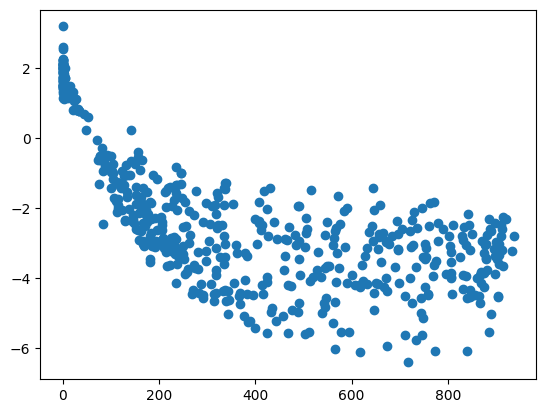

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(mR.all_outputs['fulloutput'],skiprows=[0,2],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')
bm = pd.read_csv(mR.all_outputs['biomet'],skiprows=[1],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')

df = pd.concat([df,bm[['RH_1_1_1','Ta_1_1_1','Rg_1_1_1','LWIN_1_1_1']]],axis=1)
df.loc[df['qc_co2_flux']>0,'co2_flux']=np.nan
df.loc[df['u*']<0.15,'co2_flux']=np.nan

plt.scatter(df['Rg_1_1_1'],df['co2_flux'])

df['co2_flux'].describe()


# Speedtests

All times in minutes

### 4 threads (8 timesteps each)

Normal priority: 2.05
High priority: 1.91

### 4 threads (48 timesteps each x 12 days)

High priority: 29

### Eddypro GUI (1 run [12 days, 576 timesteps])

High priority: 90